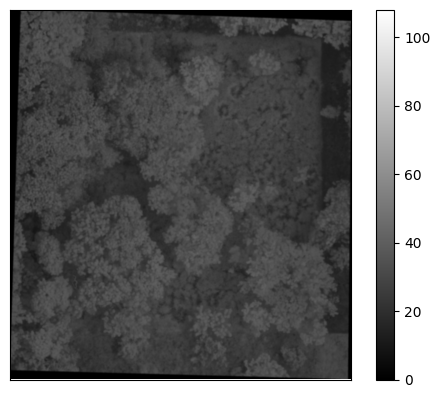

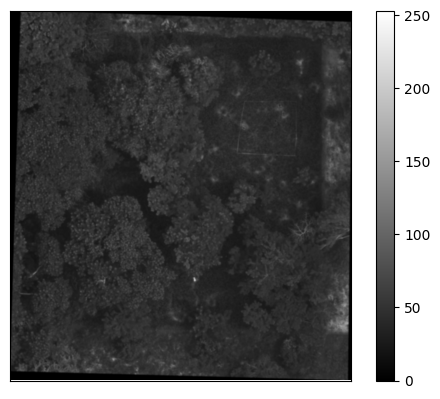

0.0
inf


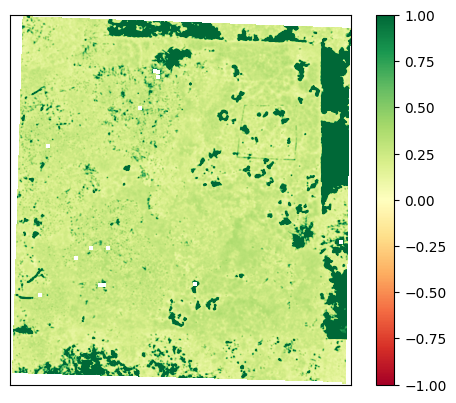

In [ ]:
#ALGUNAS AYUDITAS PARA EL PROGRAMA
# https://claudiovz.github.io/scipy-lecture-notes-ES/advanced/image_processing/index.html
# https://facundoq.github.io/courses/aa2018/res/04_imagenes_numpy.html 
# https://github.com/scikit-image/scikit-image/tree/main/skimage/segmentation/tests 
#PROGRAMA PARA ANALIZAR LOS DATOS PROVENIENTES DE LAS IMAGENES DE LOS DRONES
## IMPORTACION DE LIBRERIAS
from scipy import ndimage
from skimage import io
import os
import cv2
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from matplotlib import colormaps
from matplotlib import colors
list(colormaps)

#IMPORTACION DE IMAGENES
a=r'C:\Users\Asus\Documents\AGROSAVIA_2025\BASE_DATOS_MGSN5\EXPERIMENTAL_DATA_MGSN5\5-13Sept2024\Index_Images\Dron\2_mosaic'
os.chdir(a)
os.listdir(a)
imagenNIR=cv2.imread('5_MOMBASA_F7_13092024_general_transparent_mosaic_nir.TIF')
imagenRED=cv2.imread('5_MOMBASA_F7_13092024_general_transparent_mosaic_red.TIF')
parametro=0

imagenNDVI=np.divide((imagenNIR[:,:,parametro]-imagenRED[:,:,parametro]), (imagenNIR[:,:,parametro]+imagenRED[:,:,parametro]))
#imgtest= cv2.cvtColor(imagenprueba, cv2.COLOR_BGR2RGB)
#Mostrar imagen

#IMAGEN NIR
plt.xticks([]), plt.yticks([])
plt.imshow(imagenNIR, cmap='gray', interpolation='bicubic')
plt.colorbar()
plt.show()

#IMAGEN RED
plt.xticks([]), plt.yticks([])
plt.imshow(imagenRED, cmap='gray', interpolation='bicubic')
plt.colorbar()
plt.show()

#IMAGEN NDVI
print(np.nanmin(imagenNDVI)) 
print(np.nanmax(imagenNDVI))
np.seterr(divide='ignore', invalid='ignore')
plt.xticks([]), plt.yticks([])
plt.imshow(imagenNDVI, cmap='RdYlGn', interpolation='bicubic',vmin=-1,vmax=1)
plt.colorbar()
plt.show()

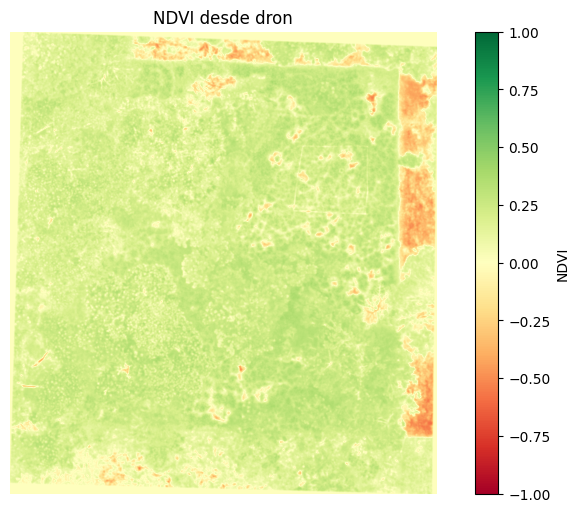

In [25]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# Cargar bandas
with rasterio.open('5_MOMBASA_F7_13092024_general_transparent_mosaic_red.TIF') as red_src:
    red = red_src.read(1).astype('float32')
    profile = red_src.profile

with rasterio.open('5_MOMBASA_F7_13092024_general_transparent_mosaic_nir.TIF') as nir_src:
    nir = nir_src.read(1).astype('float32')

# Calcular NDVI
ndvi = np.where(
    (nir + red) == 0,
    0,
    (nir - red) / (nir + red)
)

# Visualizar
plt.figure(figsize=(10, 6))
plt.imshow(ndvi, cmap='RdYlGn', interpolation='bicubic', vmin=-1, vmax=1)
plt.colorbar(label='NDVI')
plt.title('NDVI desde dron')
plt.axis('off')
plt.show()

# Guardar imagen NDVI
profile.update(dtype=rasterio.float32, count=1)
with rasterio.open('ndvi_dron.tif', 'w', **profile) as dst:
    dst.write(ndvi, 1)


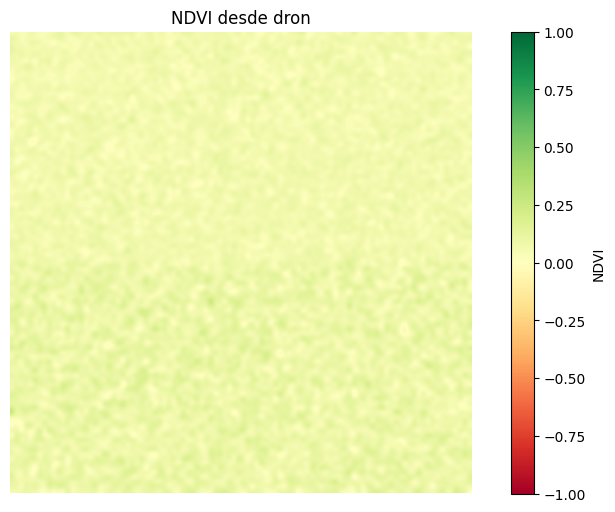

In [30]:
a=r'C:\Users\Asus\Documents\2025\UNIMAGDALENA\MATERIAL_APOYO\CODIGOS_Python_QGIS_SNAP'
os.chdir(a)
os.listdir(a)
with rasterio.open('imagen_multibanda.tif') as src:
    # Ejemplo: banda 1 = Red, banda 2 = NIR
    red = src.read(1).astype('float32')
    nir = src.read(2).astype('float32')

    # Calcular NDVI
ndvi = np.where(
    (nir + red) == 0,
    0,
    (nir - red) / (nir + red)
)

# Visualizar
plt.figure(figsize=(10, 6))
plt.imshow(ndvi, cmap='RdYlGn', interpolation='bicubic', vmin=-1, vmax=1)
plt.colorbar(label='NDVI')
plt.title('NDVI desde dron')
plt.axis('off')
plt.show()
